In [1]:
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

# Import models
from tensorflow import keras
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

keras.utils.set_random_seed(42)

2023-10-24 21:51:23.062285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X,y = make_classification(n_samples=10000, n_features=16, n_informative=8,
                          n_redundant=8,
                          n_classes=2, n_clusters_per_class=2, class_sep=1.5, 
                          flip_y=0, weights=[0.8, 0.2], random_state=1)

In [3]:
X_scaled = MinMaxScaler().fit_transform(X) 
X_scaled = pd.DataFrame(X_scaled)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.415614,0.104518,0.0,0.345011,0.411832,0.482175,1.0
1,10000.0,0.421109,0.114669,0.0,0.341835,0.417185,0.495596,1.0
2,10000.0,0.382029,0.130635,0.0,0.291296,0.363626,0.456979,1.0
3,10000.0,0.529894,0.136774,0.0,0.445601,0.536535,0.621837,1.0
4,10000.0,0.552584,0.131236,0.0,0.469273,0.558022,0.640850,1.0
5,10000.0,0.495500,0.143019,0.0,0.400032,0.493938,0.590536,1.0
6,10000.0,0.436017,0.133470,0.0,0.344750,0.425791,0.516179,1.0
7,10000.0,0.468495,0.140453,0.0,0.367729,0.460670,0.566103,1.0
8,10000.0,0.565097,0.122046,0.0,0.493749,0.576476,0.648916,1.0
9,10000.0,0.516229,0.155956,0.0,0.397700,0.514477,0.633046,1.0


In [4]:
pca = PCA(n_components=8)
pca.fit(X_scaled)
print(np.sum(pca.explained_variance_ratio_))
pca_X = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_X)
pca_df['is_anomaly'] = y
pca_df = pca_df.sort_values(by=['is_anomaly'])

1.0000000000000004


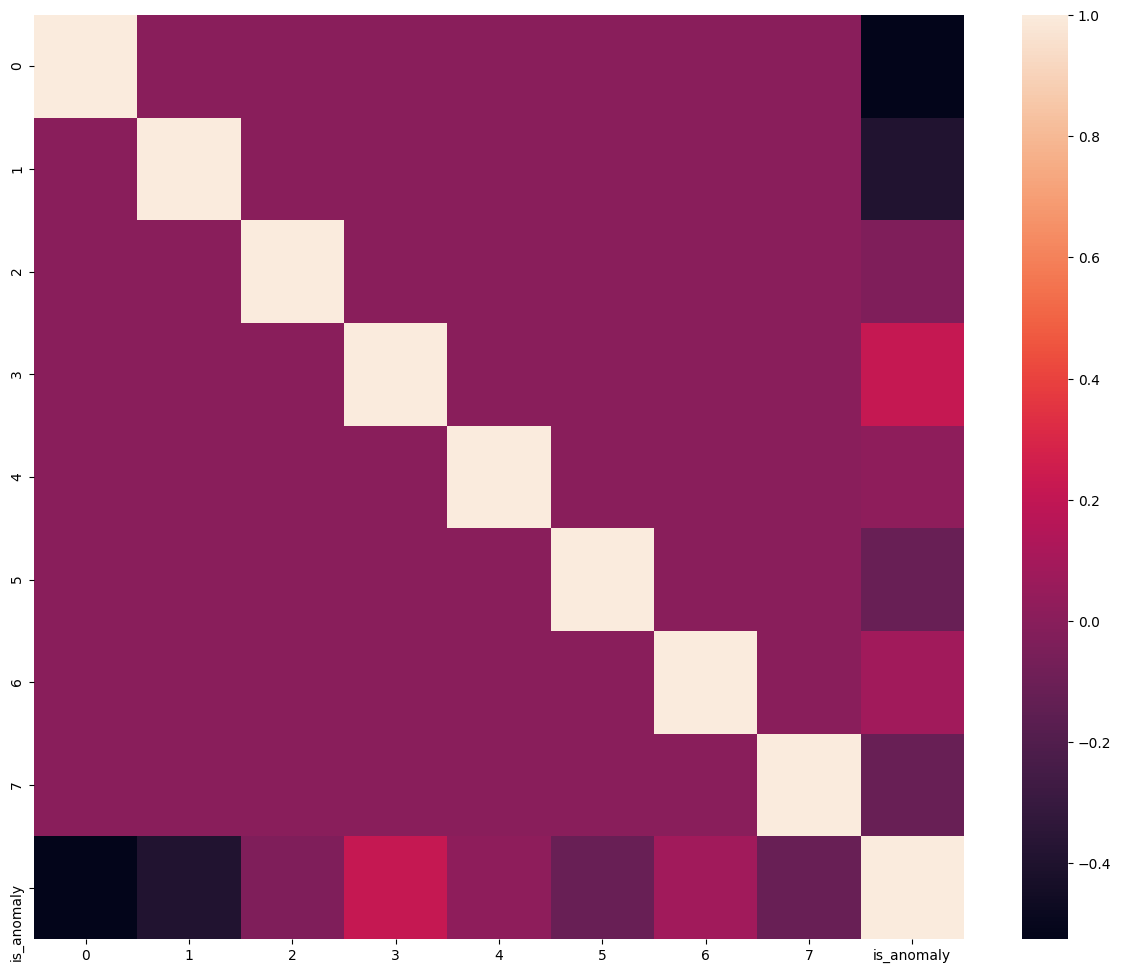

In [21]:
plot_df = pca_df.copy()

corr = plot_df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

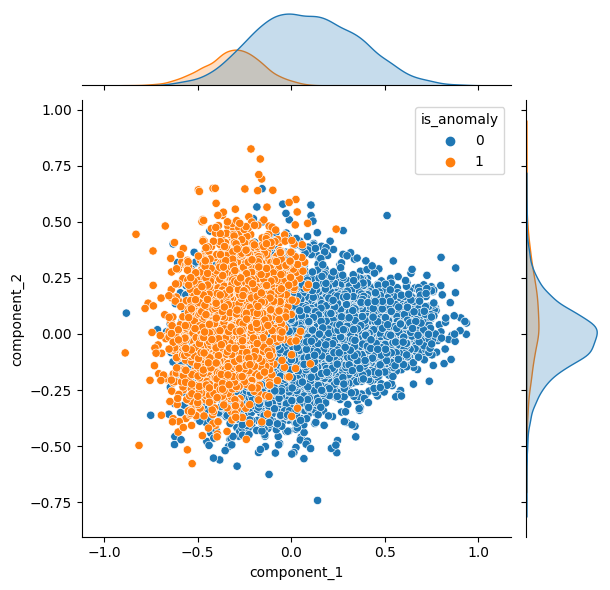

In [22]:
plot_df = plot_df.iloc[:,[0, 3, 8]]
plot_df.columns = ["component_1", "component_2", "is_anomaly"]

# Scatter plot of 2 features
sns.jointplot(data = plot_df, x="component_1", y="component_2", hue = "is_anomaly", kind='scatter')

In [7]:
all_data = pd.DataFrame(X_scaled)
all_data['is_anomaly'] = y

X = all_data.drop(['is_anomaly'], axis = 1)
y = all_data['is_anomaly']
display(all_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,is_anomaly
0,0.470176,0.405450,0.593196,0.435651,0.672981,0.279364,0.299375,0.666585,0.633211,0.630963,0.380595,0.355740,0.671178,0.475886,0.367691,0.532662,0
1,0.377430,0.319853,0.212460,0.556318,0.416597,0.783454,0.696030,0.397769,0.377845,0.305364,0.481666,0.749049,0.541606,0.669586,0.478493,0.697357,1
2,0.436690,0.443980,0.309410,0.580912,0.365964,0.542439,0.422309,0.412380,0.558971,0.382238,0.691194,0.479551,0.586210,0.551285,0.317863,0.684170,0
3,0.507103,0.362746,0.321652,0.470923,0.573033,0.474652,0.316416,0.280416,0.458646,0.329995,0.787079,0.629678,0.486046,0.639609,0.478381,0.495561,0
4,0.431895,0.481452,0.456081,0.560770,0.598296,0.354646,0.435627,0.683338,0.661973,0.508515,0.443695,0.337938,0.609601,0.417759,0.411614,0.519161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.247939,0.479135,0.237849,0.563011,0.347123,0.669657,0.550620,0.547353,0.467595,0.469009,0.406463,0.593803,0.651049,0.448887,0.590426,0.623571,0
9996,0.605072,0.463835,0.453464,0.267458,0.603464,0.608906,0.638708,0.426775,0.548789,0.603783,0.612570,0.616262,0.375822,0.690430,0.472715,0.584040,1
9997,0.405282,0.443128,0.326708,0.517402,0.607711,0.433293,0.326029,0.422759,0.566109,0.452033,0.584356,0.525342,0.537841,0.459894,0.600851,0.382670,0
9998,0.512601,0.282344,0.228789,0.604517,0.565385,0.641568,0.545316,0.251965,0.574030,0.250610,0.608397,0.632864,0.451485,0.647734,0.374540,0.536281,0


In [8]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

is_anomaly
0    6400
1    1600
Name: count, dtype: int64
is_anomaly
0    1600
1     400
Name: count, dtype: int64


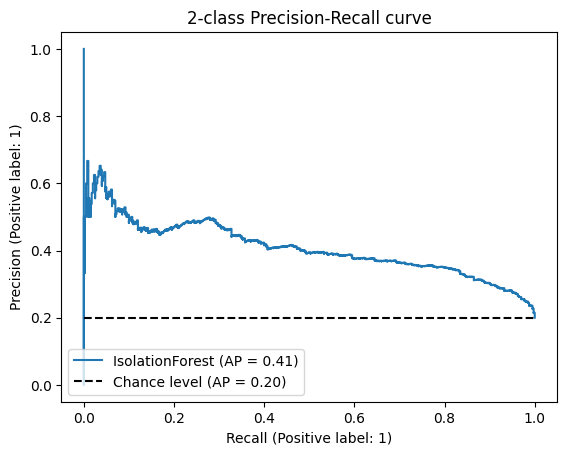

In [9]:
clf_IF = IsolationForest(random_state=42).fit(X_train)

y_train_pred = clf_IF.predict(X_train) * -1
y_train_pred[y_train_pred == -1] = 0
confusion_matrix(y_train, y_train_pred)

y_test_pred = clf_IF.predict(X_test) * -1
y_test_pred[y_test_pred == -1] = 0
confusion_matrix(y_test, y_test_pred)

y_score = clf_IF.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="IsolationForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[[1579   21]
 [  26  374]]


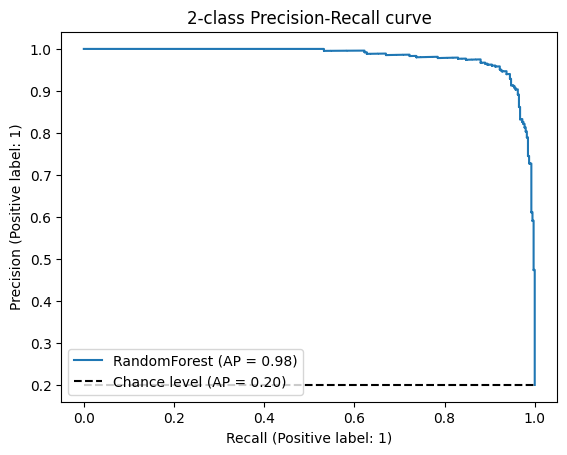

In [10]:
clf_RF = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state=42).fit(X_train, y_train)

y_test_pred = clf_RF.predict(X_test)
print(confusion_matrix(y_test, y_test_pred))

y_score = clf_RF.predict_proba(X_test)[:,1]

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [11]:
X_train_normals = X_train[y_train == 0]
X_train_normals.shape

(6400, 16)

In [12]:
n_features = 16

# model
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=16, activation='relu', input_shape=(n_features,)))
encoder.add(layers.Dropout(0.2))
encoder.add(layer=layers.Dense(units=8, activation='relu'))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=8, activation='relu', input_shape=(8,)))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=16, activation='relu'))
decoder.add(layers.Dropout(0.2))
decoder.add(layer=layers.Dense(units=n_features, activation='sigmoid'))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
    loss=losses.mean_squared_error,
    optimizer=optimizers.Adam(),
    metrics=[metrics.mean_squared_error])

autoencoder.save_weights('init.h5')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropou

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 7/50
200/200 [========

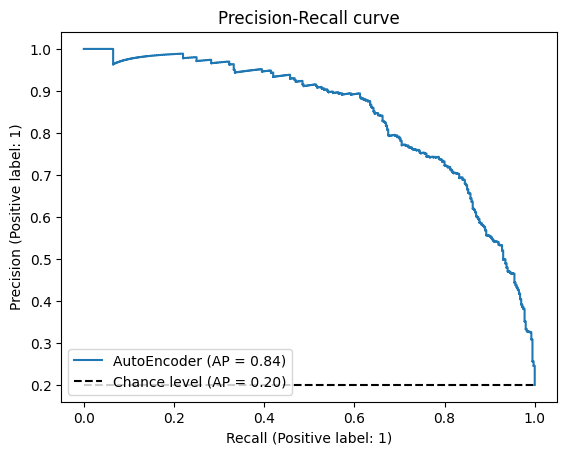

In [13]:
autoencoder.load_weights('init.h5')

es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

history = autoencoder.fit(x=X_train_normals, y=X_train_normals, epochs=50, 
                      batch_size=32, shuffle=True, verbose=1, 
                      validation_data=(X_train_normals, X_train_normals), 
                      callbacks=[es])

predicted_test = autoencoder.predict(x=X_test)

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="AutoEncoder", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7/50
250/250 [========

235/235 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 26/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 27/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 28/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 29/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 30/50
235/235 [==============================] - 0s 612us/step
[[5716  684]
 [ 793  316]]
316
7193
(7509, 16)
7193
(7193, 16)
(7193,)
Epoch 1/50
225/225 [==============================] - 0s 

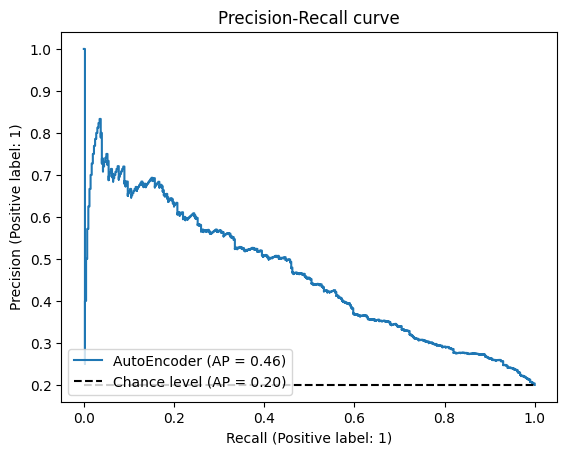

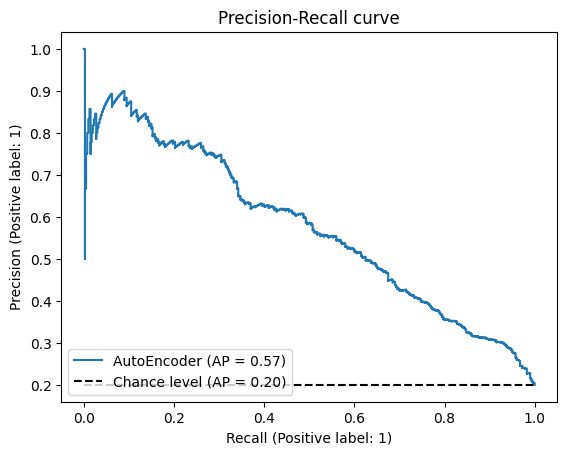

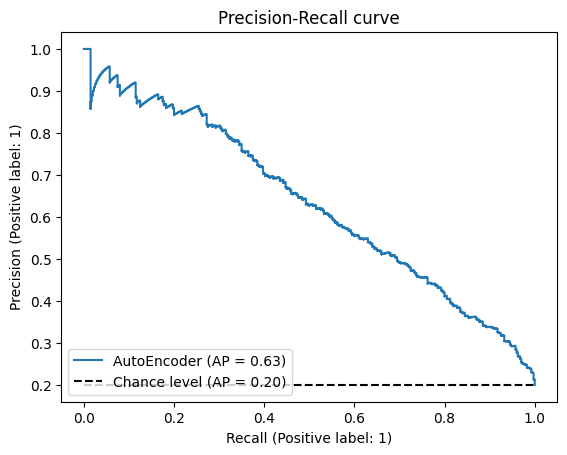

In [14]:
es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, restore_best_weights=True)

n_vec = [1000, 1000, 1000]

for i in range(3):
    
    autoencoder.load_weights('init.h5')

    history = autoencoder.fit(x=X_train, y=X_train, epochs=50, 
                          batch_size=32, shuffle=True, verbose=1, 
                          validation_data=(X_train, X_train), 
                          callbacks=[es])
    
    predicted_test = autoencoder.predict(x=X_test)

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="AutoEncoder", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = autoencoder.predict(x=X_train)

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

In [15]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    6400
1    1600
Name: count, dtype: int64
is_anomaly
0    1600
1     400
Name: count, dtype: int64
(6400, 16)


[[5807  593]
 [1193  407]]
407
7593
(8000, 16)
7593
(7593, 16)
(7593,)
[[5642  758]
 [ 951  242]]
242
7351
(7593, 16)
7351
(7351, 16)
(7351,)
[[5569  831]
 [ 782  169]]
169
7182
(7351, 16)
7182
(7182, 16)
(7182,)


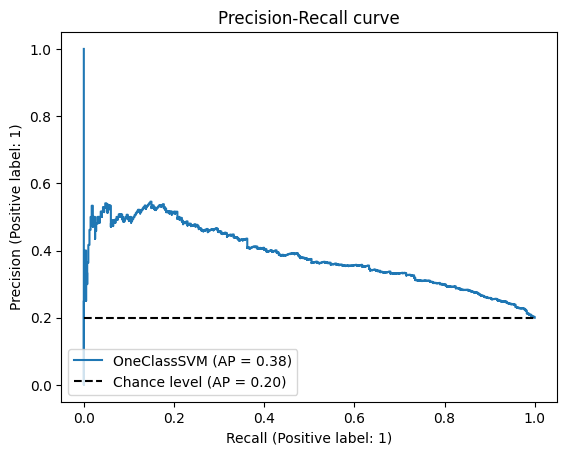

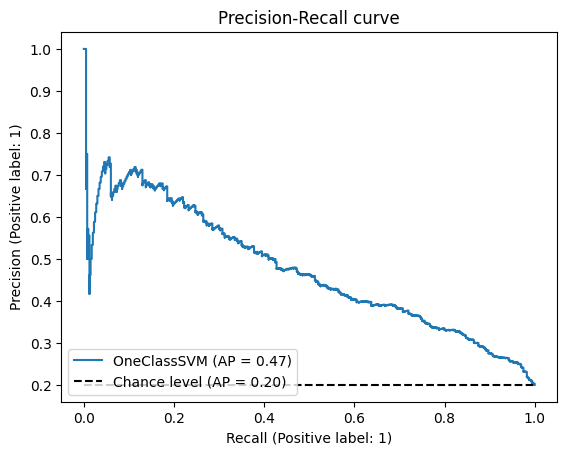

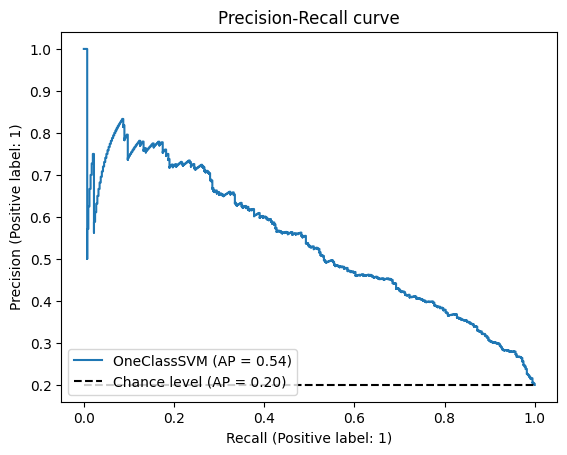

In [16]:
clf = OneClassSVM(gamma='scale', nu=0.2)

n_vec = [1000, 1000, 1000]

for i in range(3):

    clf.fit(X_train)
    
    y_score = clf.decision_function(X_test) * -1

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="OneClassSVM", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    y_score = clf.decision_function(X_train) * -1
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)
    

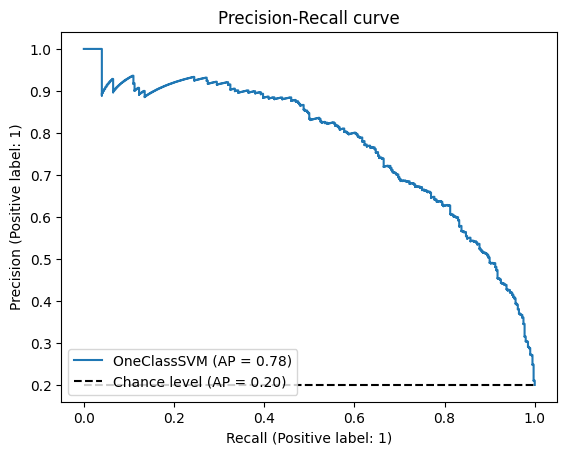

In [17]:
clf.fit(X_train_normals)
    
y_score = clf.decision_function(X_test) * -1

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="OneClassSVM", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

In [18]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=all_data['is_anomaly'])

print(y_train.value_counts())
print(y_test.value_counts())

X_train_normals = X_train[y_train == 0]
print(X_train_normals.shape)

is_anomaly
0    6400
1    1600
Name: count, dtype: int64
is_anomaly
0    1600
1     400
Name: count, dtype: int64
(6400, 16)


[[5960  440]
 [1040  560]]
560
7440
(8000, 16)
7440
(7440, 16)
(7440,)
[[5676  724]
 [ 764  276]]
276
7164
(7440, 16)
7164
(7164, 16)
(7164,)
[[5544  856]
 [ 620  144]]
144
7020
(7164, 16)
7020
(7020, 16)
(7020,)


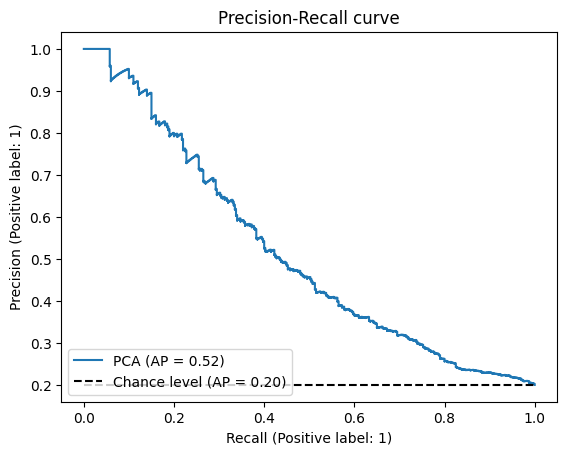

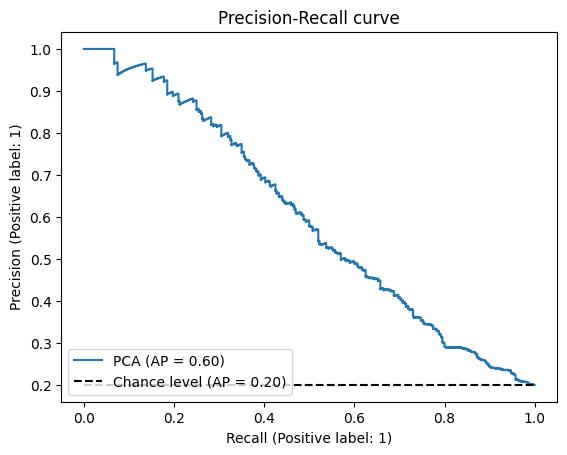

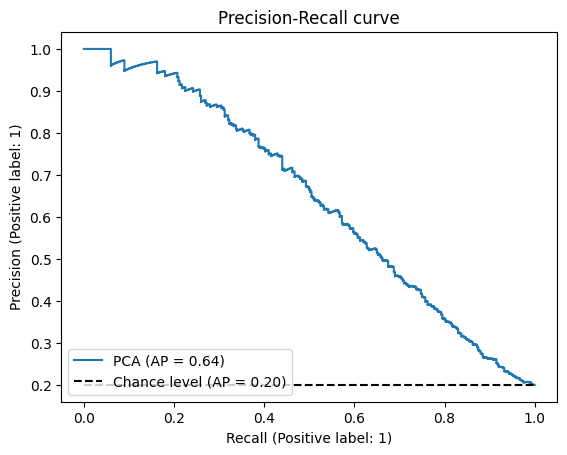

In [19]:
n_vec = [1000, 1000, 1000]

for i in range(3):
    
    pca = PCA(n_components=6, random_state=42)
    pca_train = pd.DataFrame(pca.fit_transform(X_train))
    pca_test = pd.DataFrame(pca.transform(X_test))
    
    predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

    y_score = losses.mean_squared_error(predicted_test, X_test)

    display = PrecisionRecallDisplay.from_predictions(
        y_test, y_score, name="PCA", plot_chance_level=True
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    
    predicted_train = pd.DataFrame(pca.inverse_transform(pca_train))

    y_score = losses.mean_squared_error(predicted_train, X_train)
    
    y_train_pred = np.array([0] * len(y_train))
    y_train_pred[np.argsort(y_score)[-n_vec[i]:]] = 1
    print(confusion_matrix(y_train, y_train_pred))
    print(len(np.where((y_train == y_train_pred) & (y_train_pred == 1))[0]))
    print(len(np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]))
    
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    print(X_train.shape)
    retain_index = np.where((y_train != y_train_pred) | (y_train_pred == 0))[0]
    print(len(retain_index))
    X_train = X_train.iloc[retain_index, :]
    y_train = y_train[retain_index]
    print(X_train.shape)
    print(y_train.shape)

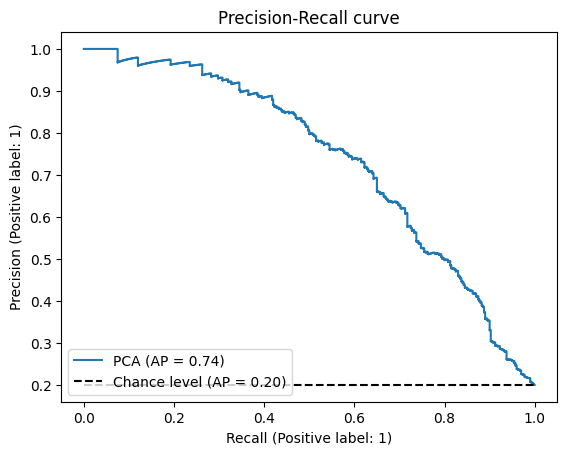

In [20]:
pca = PCA(n_components=6, random_state=42)
pca_train = pd.DataFrame(pca.fit_transform(X_train_normals))
pca_test = pd.DataFrame(pca.transform(X_test))

predicted_test = pd.DataFrame(pca.inverse_transform(pca_test))

y_score = losses.mean_squared_error(predicted_test, X_test)

display = PrecisionRecallDisplay.from_predictions(
    y_test, y_score, name="PCA", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")